Aprenderás como leer datos de un CSV que no tiene el formato estándar.
Descubrirás los distintos tipos de separadores que existen.

Sabemos que los archivos CSV suelen usar comas como delimitadores, pero a veces utilizan otros caracteres, como las tabulaciones o el punto y coma. Al leer el archivo gpp_modified.csv con read_csv() sin parámetros adicionales, las columnas aparecieron desordenadas y el formato no tenía sentido.

import pandas as pd

data = pd.read_csv('/datasets/gpp_modified.csv')

print(data.head())
  Afghanistan|Kajaki Hydroelectric Power Plant Afghanistan|33   0|32   322|65   119|Hydro|
0                                 Afghanistan|Kandahar DOG|10   0|31    67|65   795|Solar|
1                                 Afghanistan|Kandahar JOL|10   0|31   623|65   792|Solar|
2           Afghanistan|Mahipar Hydroelectric Power Plant ...   0|34   556|69  4787|Hydro|
3           Afghanistan|Naghlu Dam Hydroelectric Power Pla...   0|34   641|69   717|Hydro|
4           Afghanistan|Nangarhar (Darunta) Hydroelectric ...  55|34  4847|70  3633|Hydro|

Usando el parámetro sep=

Observamos que el archivo tiene comas, pero el verdadero delimitador parece ser el carácter |. Necesitamos tener esto en cuenta al leer el archivo usando el parámetro sep= en read_csv() para indicar el delimitador correcto:

data = pd.read_csv('/datasets/gpp_modified.csv', sep='|')

print(data.head())

   Afghanistan       Kajaki Hydroelectric Power Plant Afghanistan   33,0   32,322   65,119  Hydro  Unnamed: 6
0  Afghanistan                                       Kandahar DOG   10,0    31,67   65,795  Solar         NaN
1  Afghanistan                                       Kandahar JOL   10,0   31,623   65,792  Solar         NaN
2  Afghanistan      Mahipar Hydroelectric Power Plant Afghanistan   66,0   34,556  69,4787  Hydro         NaN
3  Afghanistan   Naghlu Dam Hydroelectric Power Plant Afghanistan  100,0   34,641   69,717  Hydro         NaN
4  Afghanistan  Nangarhar (Darunta) Hydroelectric Power Plant ...  11,5

Usando los parámetros header= y names=
El DataFrame ya se ve mejor, pero los nombres de las columnas son incorrectos porque pandas ha usado la primera fila de datos como encabezado. Para evitar esto, usamos header=None y proporcionamos una lista de nombres de columnas con el parámetro names=.

column_names = [
    'country',
    'name',
    'capacity_mw',
    'latitude',
    'longitude',
    'primary_fuel',
    'owner'
]
data = pd.read_csv('/datasets/gpp_modified.csv', sep='|', header=None, names=column_names)

print(data.head())
             0                                                  1      2        3        4      5    6    
0  Afghanistan       Kajaki Hydroelectric Power Plant Afghanistan   33,0   32,322   65,119  Hydro  NaN
1  Afghanistan                                       Kandahar DOG   10,0    31,67   65,795  Solar  NaN
2  Afghanistan                                       Kandahar JOL   10,0   31,623   65,792  Solar  NaN
3  Afghanistan      Mahipar Hydroelectric Power Plant Afghanistan   66,0   34,556  69,4787  Hydro  NaN
4  Afghanistan   Naghlu Dam Hydroelectric Power Plant Afghanistan  100,0   34,641   69,717  Hydro  NaN
Usando el parámetro decimal=
En EE.UU. y la mayoría de los lenguajes de programación, el separador decimal es el punto (.). Sin embargo, los datos internacionales a menudo usan comas (,). Cuando pandas lee datos con comas como separadores decimales, los trata como cadenas de texto. Para corregir esto en las columnas capacity_mw, latitude y longitude, usamos el parámetro decimal=',' en read_csv() para indicar que las comas son separadores decimales.

data = pd.read_csv(
    '/datasets/gpp_modified.csv',
    sep='|',
    header=None,
    names=column_names,
    decimal=',',
)

print(data.head())
       country                                              name capacity_mw latitude longitude primary_fuel owner      
0  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan        33.0   32.322    65.119        Hydro   NaN

1  Afghanistan                                      Kandahar DOG        10.0    31.67    65.795        Solar   NaN

2  Afghanistan                                      Kandahar JOL        10.0   31.623    65.792        Solar   NaN

3  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan        66.0   34.556   69.4787        Hydro   NaN

4  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan       100.0   34.641    69.717        Hydro   NaN

¡Ahora sí! Los datos están correctamente formateados y pandas los reconoce como números de punto flotante. Con estos ajustes, conseguimos leer el archivo CSV de manera correcta y obtener un DataFrame bien estructurado, listo para su análisis.

Práctica guiada

¡Necesitamos tu ayuda! Nuestro equipo ha intentado leer un conjunto de datos, pero el resultado es un desastre. ¿Puedes corregirlo?

Esto es lo que nuestro equipo ha hecho:

import pandas as pd

df = pd.read_csv("/datasets/sports.csv")
print(df.head())

Y el resultado es: 

    Messi;Football;37;7.5
Mbappe;Football;24;10    2.0
Djokovic;Tennis;36;8    NaN

Reescribe el código para que los datos sean cargados correctamente. Los datos están separados por punto y coma. 
Imprime el resultado usando el método head().

In [ ]:
import pandas as pd

df = pd.read_csv("/datasets/sports.csv", sep=';')

print(df.head())#Escribe tu código

"""Resultado
      Messi  Football  37   7,5
0    Mbappe  Football  24  10,2
1  Djokovic    Tennis  36   8,0"""

¡Necesitamos más ayuda! Has podido subir el dataset usando el separador correcto, pero los datos no tienen encabezado. 

Esto es lo que has hecho:

import pandas as pd

df = pd.read_csv("/datasets/sports.csv", sep=";")

print(df.head())

Y el resultado es: 

    Messi      Football    37    7,5
0    Mbappe    Football    24    10,2
1    Djokovic    Tennis    36    8,0

Carga nuevamente el archivo y reescribe el código para que los datos sean cargados con un encabezado adecuado. Las columnas deben ser llamadas “Nombre”, “Deporte”, “Edad” y “Salario”. 

No se olvide de imprimir el resultado usando el método head().

In [ ]:
import pandas as pd
columnas = [
    'Nombre',
    'Deporte',
    'Edad',
    'Salario'
]

df = pd.read_csv("/datasets/sports.csv", sep=";", header=None, names = columnas)

print(df.head())#Escribe tu código

"""Resultado
     Nombre   Deporte  Edad Salario
0     Messi  Football    37     7,5
1    Mbappe  Football    24    10,2
2  Djokovic    Tennis    36     8,0"""

¡Te necesitamos una vez más! Has podido subir el dataset, separarlo en columnas y agregar el encabezado, pero hemos descubierto que los salarios no están bien cargados. 

Esto es lo que has hecho:

import pandas as pd

columnas = ["Nombre", "Deporte", "Edad", "Salario"]

df = pd.read_csv("/datasets/sports.csv", sep=";", header=None, names=columnas)

print(df.head())

Y el resultado es: 

    Nombre     Deporte      Edad    Salario
0    Messi       Football      37      7,5
1    Mbappe     Football      24      10,2
2    Djokovic     Tennis      36      8,0

Observa como los salarios tienen coma. Carga nuevamente el archivo y reescribe el código para que los salarios reconozcan “,” como separador decimal.
Imprime el resultado usando el método head().

In [ ]:
import pandas as pd

columnas = [
    'Nombre',
    'Deporte',
    'Edad',
    'Salario'
]

df = pd.read_csv("/datasets/sports.csv", sep=";", header=None, names = columnas, decimal = ',')

print(df.head())#Escribe tu código

"""Resultado
     Nombre   Deporte  Edad  Salario
0     Messi  Football    37      7.5
1    Mbappe  Football    24     10.2
2  Djokovic    Tennis    36      8.0"""

Tarea 1

Hay un conjunto de datos disponible en /datasets/letters_colors_decimals.csv. Los valores del conjunto de datos están separados por $.

Léelo de forma que:

La primera fila sea la cabecera.

Las columnas estén separadas correctamente.

Los decimales estén separados por a.

Imprime el DataFrame.

In [ ]:
import pandas as pd

df = pd.read_csv("/datasets/letters_colors_decimals.csv",sep="$", header=0, decimal="a")

print(df)

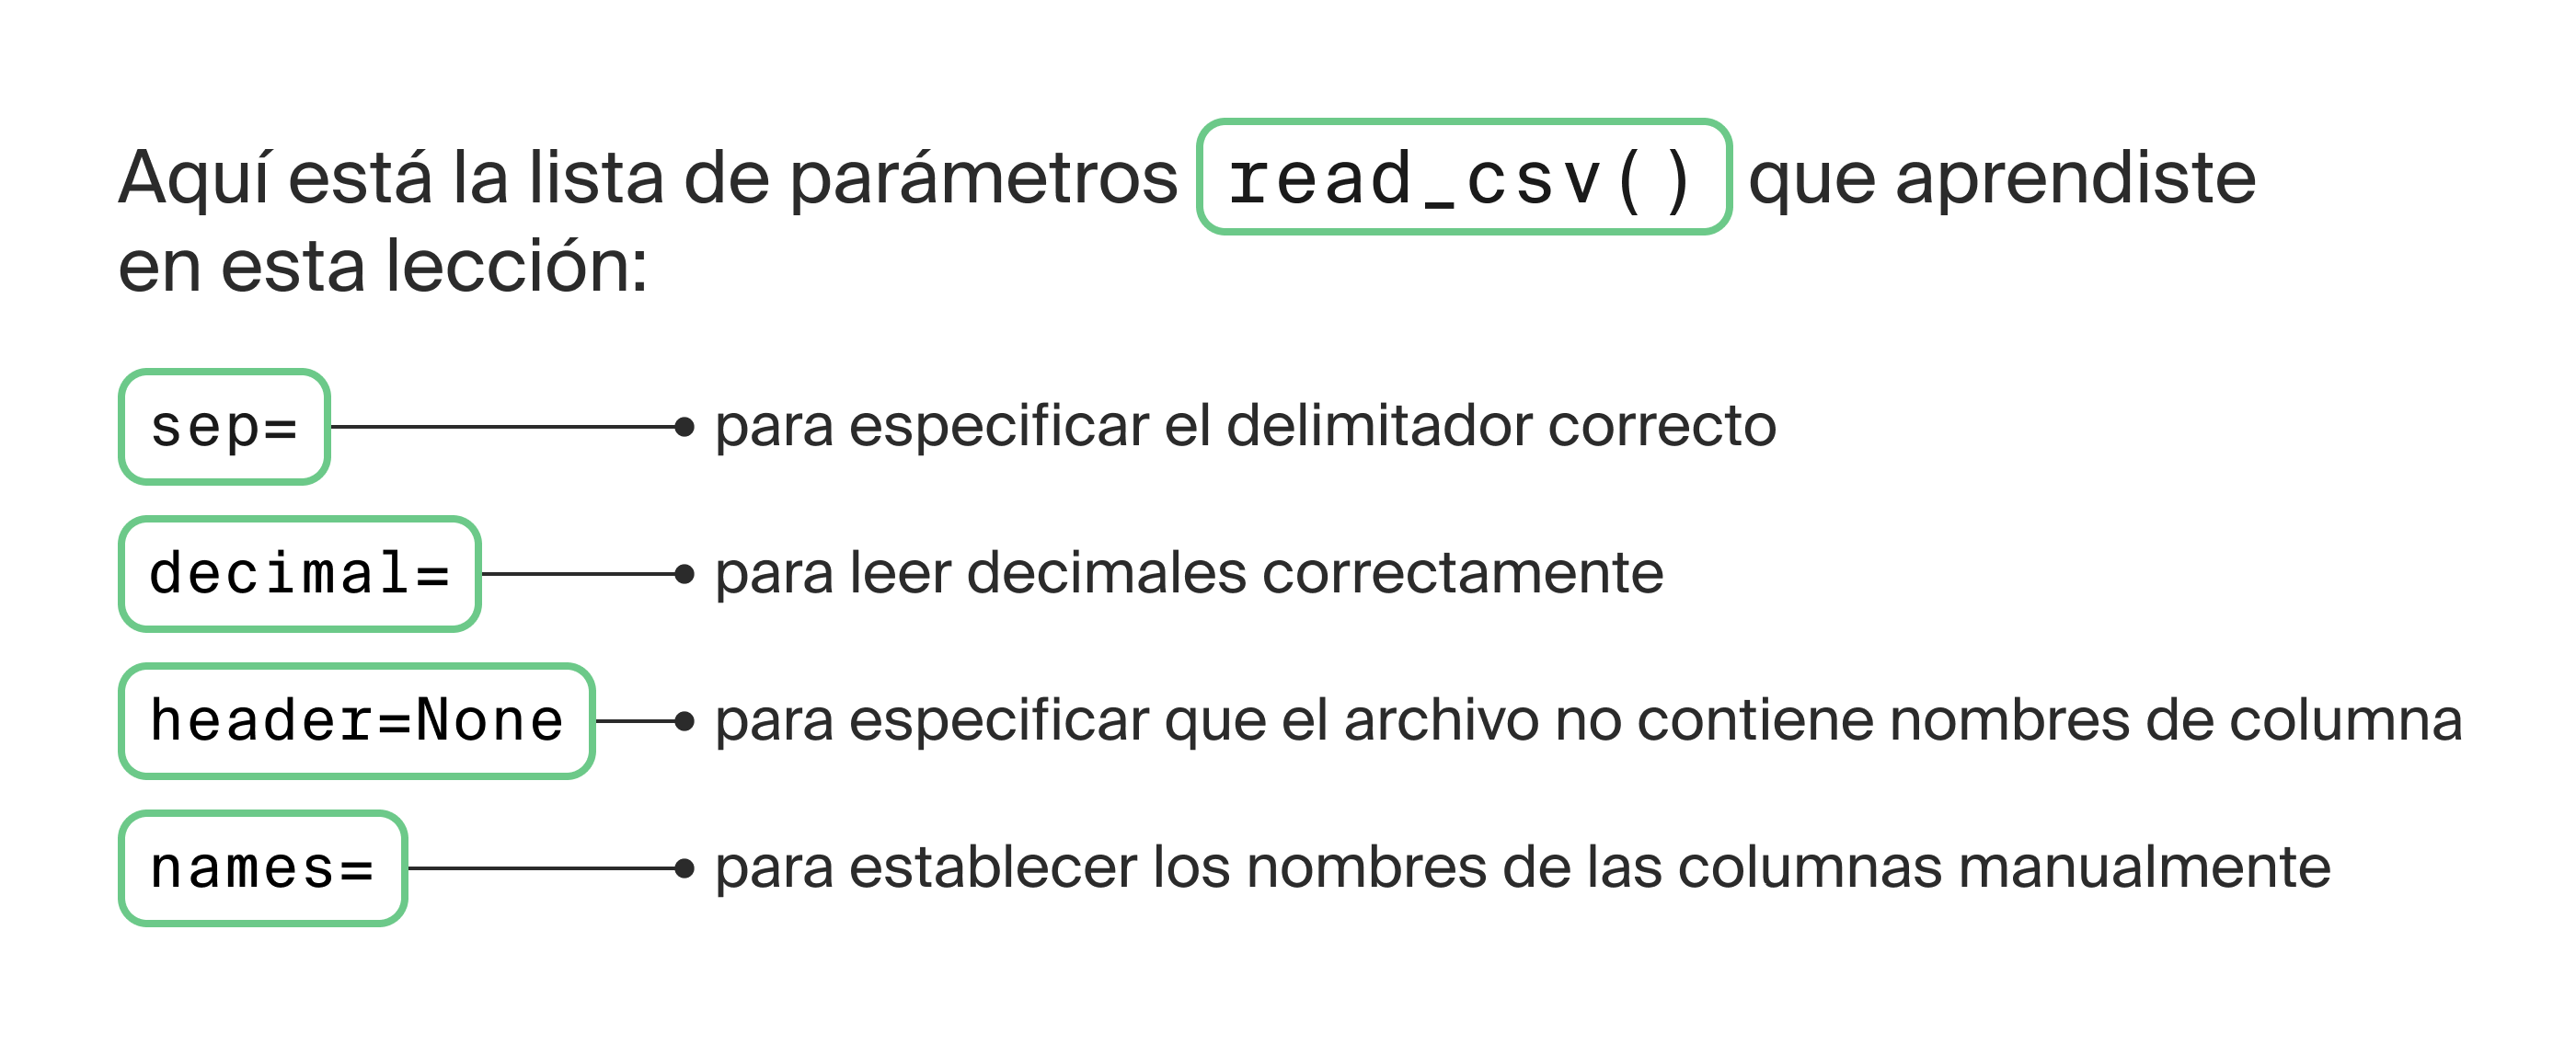

Terminología

CSV (valores separados por comas): formato de archivo en el que los datos se almacenan en filas con cada valor separado por una coma. Comúnmente utilizado para datos tabulares.

pandas.read_csv(): una función de Pandas utilizada para leer ficheros CSV y cargar los datos en un DataFrame.

Delimitador: un carácter (como una coma, tabulador o punto y coma) utilizado para separar valores en un fichero CSV. En read_csv(), esto es controlado por el parámetro sep.

Recursos adicionales

En Jupyter puedes escribir el nombre del método y presionar Shift+Tab para ver la documentación en una ventana emergente. Esto muestra el docstring, que incluye todos los parámetros, sus valores por defecto y descripciones breves.